In [1]:
# Start small and save your time.

In [2]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()

# for calculations
import numpy as np 
import math

import matplotlib.pyplot as plt # for plotting

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
from matplotlib.gridspec import GridSpec

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

from ipynb.fs.full.MyFunctions_00 import *

In [4]:
voids_M_r = read_data_db('rabsmag_VOIDS_' + 'new_' + '04-11-23') # timestamp())
walls_M_r = read_data_db('rabsmag_WALLS_' + 'new_' + '04-11-23') # timestamp())

voids_M_r.head()

read rabsmag_VOIDS_new_04-11-23
read rabsmag_WALLS_new_04-11-23


,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,Z,SFR,sSFR,BPTclass,HImass,u_r,g_r,u_r_err,g_r_err
0,75.0,24.0,0.933297,1,145.874464,-0.608775,266,138,51630,-20.979137,0.071590,0.437294,-10.228045,2.0,NaN,1.570181,0.527512,0.092720,0.031002
1,95.0,24.0,0.948802,1,146.222266,-0.375920,266,168,51630,-20.544321,0.067406,0.436883,-10.211826,1.0,NaN,1.867657,0.645546,0.077289,0.028860
2,121.0,23.0,0.987329,1,145.681110,-0.867233,266,207,51630,-21.178394,0.067595,-1.141768,-12.134328,5.0,NaN,2.711828,0.698425,0.282711,0.029654
3,127.0,22.0,0.998411,1,145.759730,-0.813891,266,216,51630,-20.736423,0.067634,-0.348571,-11.222754,4.0,NaN,2.237722,0.712046,0.085222,0.028771
4,128.0,22.0,0.900567,1,145.708927,-0.747680,266,217,51630,-19.849358,0.071566,-1.348428,-11.774809,-1.0,NaN,2.189016,0.687010,0.130119,0.031340


In [5]:
print(len(voids_M_r))
# voids_M_r = voids_M_r[(voids_M_r['M_r_NYU'] < 5000)]
# voids_M_r = voids_M_r[(voids_M_r['z'] < 0.125)]
print(len(voids_M_r))

voids_M_r.head()

73958
73958


,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,Z,SFR,sSFR,BPTclass,HImass,u_r,g_r,u_r_err,g_r_err
0,75.0,24.0,0.933297,1,145.874464,-0.608775,266,138,51630,-20.979137,0.071590,0.437294,-10.228045,2.0,NaN,1.570181,0.527512,0.092720,0.031002
1,95.0,24.0,0.948802,1,146.222266,-0.375920,266,168,51630,-20.544321,0.067406,0.436883,-10.211826,1.0,NaN,1.867657,0.645546,0.077289,0.028860
2,121.0,23.0,0.987329,1,145.681110,-0.867233,266,207,51630,-21.178394,0.067595,-1.141768,-12.134328,5.0,NaN,2.711828,0.698425,0.282711,0.029654
3,127.0,22.0,0.998411,1,145.759730,-0.813891,266,216,51630,-20.736423,0.067634,-0.348571,-11.222754,4.0,NaN,2.237722,0.712046,0.085222,0.028771
4,128.0,22.0,0.900567,1,145.708927,-0.747680,266,217,51630,-19.849358,0.071566,-1.348428,-11.774809,-1.0,NaN,2.189016,0.687010,0.130119,0.031340


In [6]:
# filter out outliers

print(len(walls_M_r))
# walls_M_r = walls_M_r[(walls_M_r['M_r'] < 5000)]
# walls_M_r = walls_M_r[(walls_M_r['z'] < 0.125)]
print(len(walls_M_r))

walls_M_r.head()

223257
223257


,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,Z,SFR,sSFR,BPTclass,HImass,u_r,g_r,u_r_err,g_r_err
0,464.0,21.0,0.765606,0,148.728855,0.188863,267,152,51608,-20.542107,0.094445,0.365831,-9.764698,1.0,NaN,1.309233,0.567883,0.619454,0.037097
1,570.0,23.0,0.980080,0,147.428682,1.107487,267,362,51608,-21.410318,0.098661,-0.852778,-12.150420,-1.0,NaN,2.323511,0.719944,0.113655,0.031594
2,572.0,21.0,0.788920,0,147.511343,1.100596,267,369,51608,-20.423737,0.093593,-1.139221,-11.910791,-1.0,NaN,3.057472,0.754032,0.345188,0.033609
3,576.0,23.0,0.801471,0,147.561502,1.229841,267,378,51608,-21.105976,0.098923,0.393559,-10.500205,3.0,NaN,1.843855,0.594555,0.092584,0.030253
4,615.0,21.0,0.915904,0,148.015821,1.148428,267,442,51608,-19.731482,0.064104,-0.719594,-11.158921,2.0,NaN,2.254469,0.692661,0.089241,0.029552


In [7]:
bright_line = -20.09 # fraction can cause binning problems
main_line = -17.00

walls_bright = walls_M_r[(walls_M_r['rabsmag_NSA'] <= bright_line)]

walls_main = walls_M_r[(walls_M_r['rabsmag_NSA'] > bright_line) &
                       (walls_M_r['rabsmag_NSA'] <= main_line)]

walls_dwarf = walls_M_r[(walls_M_r['rabsmag_NSA'] > main_line)]

voids_bright = voids_M_r[(voids_M_r['rabsmag_NSA'] <= bright_line)]

voids_main = voids_M_r[(voids_M_r['rabsmag_NSA'] > bright_line) &
                       (voids_M_r['rabsmag_NSA'] <= main_line)]

voids_dwarf = voids_M_r[(voids_M_r['rabsmag_NSA'] > main_line)]

In [8]:
# define value limits
y_low = -24.0
y_high = -10.0
x_low = 0.00
x_high = 0.11

# 0.00, 0.11, -24.0, -10.0

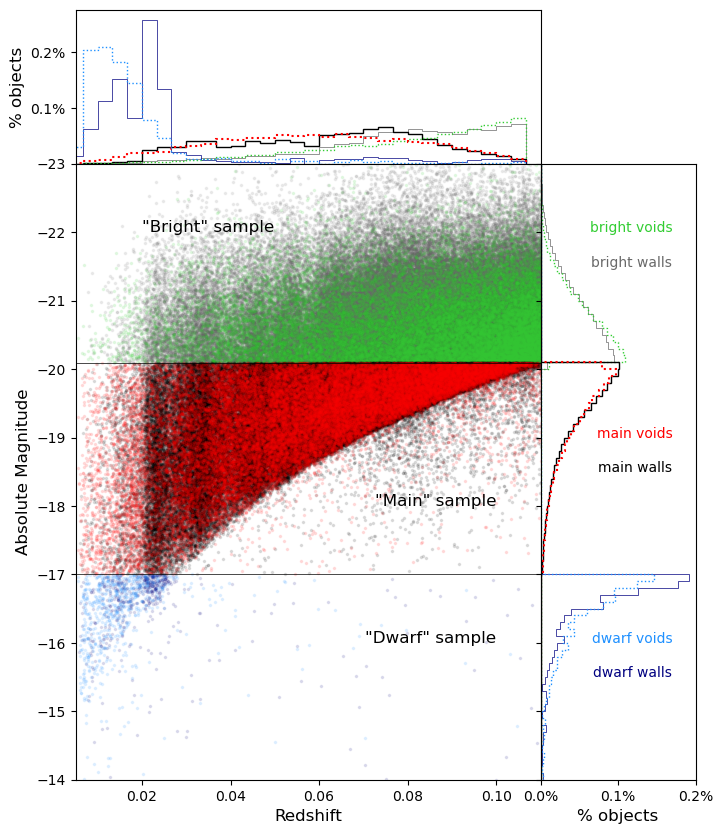

In [8]:
# plot M_r vs. z diagram!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (8, 10), 
                        gridspec_kw = {'height_ratios': [1, 4],
                                     'width_ratios': [3, 1]} )

size = 10.0
a = 0.1

z_bins = np.linspace(0, 0.11, num = 33, endpoint = False)
M_r_bins = np.linspace(-24, -10, num = 140, endpoint = False)

plt.subplots_adjust(wspace = 0, hspace = 0)

plt.gca().invert_yaxis()

axs[1, 0].scatter(walls_bright['Z'], 
                  walls_bright['rabsmag_NSA'], 
                  s = size, 
                  c = 'dimgrey',
                  marker = ".", 
                  label = 'bright walls',
                  alpha = a)

axs[1, 0].scatter(voids_bright['Z'], 
                  voids_bright['rabsmag_NSA'], 
                  s = size, 
                  c = 'limegreen',
                  marker = ".", 
                  label = 'bright voids',
                  alpha = a)


axs[1, 0].scatter(walls_main['Z'], 
                  walls_main['rabsmag_NSA'], 
                  s = size, 
                  c = 'black',
                  marker = ".", 
                  label = 'main walls',
                  alpha = a)

axs[1, 0].scatter(voids_main['Z'], 
                  voids_main['rabsmag_NSA'], 
                  s = size, 
                  c = 'red',
                  marker = ".", 
                  label = 'main voids',
                  alpha = a)


axs[1, 0].scatter(walls_dwarf['Z'], 
                  walls_dwarf['rabsmag_NSA'], 
                  s = size, 
                  c = 'navy',
                  marker = ".", 
                  label = 'dwarf walls',
                  alpha = a)

axs[1, 0].scatter(voids_dwarf['Z'], 
                  voids_dwarf['rabsmag_NSA'], 
                  s = size, 
                  c = 'dodgerblue',
                  marker = ".", 
                  label = 'dwarf voids',
                  alpha = a)

axs[1, 0].set_ylim([y_high - 4, y_low + 1])
axs[1, 0].set_xlim([0.005, x_high])

axs[1, 0].axhline(y = bright_line, color = 'black', linewidth = 0.5)
axs[1, 0].axhline(y = main_line, color = 'black', linewidth = 0.5)

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# only label the outer axes of the grouped subplots
# for ax in axs.flat:
#     ax.label_outer()

    
# make a histogram in the top left subplot that corresponds
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_bright['Z'], 
               color = "dimgray",
               histtype = "step",
               linewidth = 0.5,
               weights = np.ones_like(walls_bright['Z']) / len(walls_bright['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(walls_main['Z'], 
               color = "black",
               histtype = "step",
               linewidth = 1.0,
               weights = np.ones_like(walls_main['Z']) / len(walls_main['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(walls_dwarf['Z'], 
               color = "navy",
               histtype = "step",
               linewidth = 0.5,
               weights = np.ones_like(walls_dwarf['Z']) / len(walls_dwarf['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(voids_bright['Z'], 
               color = "limegreen",
               histtype = "step",
               linewidth = 1.0,
               linestyle = 'dotted',
               weights = np.ones_like(voids_bright['Z']) / len(voids_bright['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(voids_main['Z'], 
               color = "red",
               histtype = "step",
               linewidth = 1.5,
               linestyle = 'dotted',
               weights = np.ones_like(voids_main['Z']) / len(voids_main['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(voids_dwarf['Z'], 
               color = "dodgerblue",
               histtype = "step",
               linewidth = 1.0,
               linestyle = 'dotted',
               weights = np.ones_like(voids_dwarf['Z']) / len(voids_dwarf['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].set_ylim([0.00001, 0.275])


axs[1, 1].hist(walls_bright['rabsmag_NSA'], 
               color = "dimgray", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 0.5,
#                label = 'bright walls',
               weights = np.ones_like(walls_bright['rabsmag_NSA']) / len(walls_bright['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].hist(voids_bright['rabsmag_NSA'], 
               color = "limegreen", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 1.0,
               linestyle = 'dotted',
#                label = 'bright voids',
               weights = np.ones_like(voids_bright['rabsmag_NSA']) / len(voids_bright['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].hist(walls_main['rabsmag_NSA'], 
               color = "black",
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 1.0,
#                label = 'main  walls',
               weights = np.ones_like(walls_main['rabsmag_NSA']) / len(walls_main['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].hist(voids_main['rabsmag_NSA'], 
               color = "red", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 1.5,
               linestyle = 'dotted',
#                label = 'main voids',
               weights = np.ones_like(voids_main['rabsmag_NSA']) / len(voids_main['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].hist(walls_dwarf['rabsmag_NSA'], 
               color = "navy", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 0.5,
#                label = 'dwarf walls',
               weights = np.ones_like(walls_dwarf['rabsmag_NSA']) / len(walls_dwarf['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

vd = axs[1, 1].hist(voids_dwarf['rabsmag_NSA'], 
               color = "dodgerblue", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 1.0,
               linestyle = 'dotted',
#                label = 'dwarf voids',
               weights = np.ones_like(voids_dwarf['rabsmag_NSA']) / len(voids_dwarf['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].set_xlim([0, 0.200])

# Remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_ylabel('Absolute Magnitude', fontsize = 'large')
axs[1, 0].set_xlabel('Redshift', fontsize = 'large')

axs[0, 0].set_ylabel('% objects', fontsize = 'large')
axs[1, 1].set_xlabel('% objects', fontsize = 'large')

# Add text labels
axs[1, 0].text(0.02, -22.0, '"Bright" sample', fontdict = None, size = 'large', ha = 'left')
axs[1, 0].text(0.10, -18.0, '"Main" sample', fontdict = None, size = 'large', ha = 'right')
axs[1, 0].text(0.10, -16.0, '"Dwarf" sample', fontdict = None, size = 'large', ha = 'right')

axs[1, 1].text(0.17, -22.0, 'bright voids', fontdict = None, c = 'limegreen', ha = 'right')
axs[1, 1].text(0.17, -21.5, 'bright walls', fontdict = None, c = 'dimgray', ha = 'right')

axs[1, 1].text(0.17, -19.0, 'main voids', fontdict = None, c = 'red', ha = 'right')
axs[1, 1].text(0.17, -18.5, 'main walls', fontdict = None, c = 'black', ha = 'right')

axs[1, 1].text(0.17, -16.0, 'dwarf voids', fontdict = None, c = 'dodgerblue', ha = 'right')
axs[1, 1].text(0.17, -15.5, 'dwarf walls', fontdict = None, c = 'navy', ha = 'right')

fig.savefig('Figures/rabsmag_vs_Z_' + 'new_' + timestamp() + '.png', dpi = 600)
plt.show()

In [9]:
print(len(walls_bright))
print(len(filter_new(walls_bright, x_low, x_high, y_low, y_high)))
filter_new(walls_bright, x_low, x_high, y_low, y_high).to_csv('Files/walls_bright_' + 'new_' + timestamp() + '.csv', index = False)

122983
119375


In [10]:
print(len(walls_main))
print(len(filter_new(walls_main, x_low, x_high, y_low, y_high)))
filter_new(walls_main, x_low, x_high, y_low, y_high).to_csv('Files/walls_main_' + 'new_' + timestamp() + '.csv', index = False)

99712
99658


In [11]:
print(len(walls_dwarf))
print(len(filter_new(walls_dwarf, x_low, x_high, y_low, y_high)))
filter_new(walls_dwarf, x_low, x_high, y_low, y_high).to_csv('Files/walls_dwarf_' + 'new_' + timestamp() + '.csv', index = False)

562
540


In [12]:
print(len(voids_bright))
print(len(filter_new(voids_bright, x_low, x_high, y_low, y_high)))
filter_new(voids_bright, x_low, x_high, y_low, y_high).to_csv('Files/voids_bright_' + 'new_' + timestamp() + '.csv', index = False)

33442
30939


In [13]:
print(len(voids_main))
print(len(filter_new(voids_main, x_low, x_high, y_low, y_high)))
filter_new(voids_main, x_low, x_high, y_low, y_high).to_csv('Files/voids_main_' + 'new_' + timestamp() + '.csv', index = False)

39782
39715


In [14]:
print(len(voids_dwarf))
print(len(filter_new(voids_dwarf, x_low, x_high, y_low, y_high)))
filter_new(voids_dwarf, x_low, x_high, y_low, y_high).to_csv('Files/voids_dwarf_' + 'new_' + timestamp() + '.csv', index = False)

734
718


In [15]:
print(len(voids_bright) + len(voids_main) + len(voids_dwarf))
print(len(filter_new(voids_bright, x_low, x_high, y_low, y_high)) + 
          len(filter_new(voids_main, x_low, x_high, y_low, y_high)) + 
              len(filter_new(voids_dwarf, x_low, x_high, y_low, y_high)))

73958
71372


In [16]:
print(len(walls_bright) + len(walls_main) + len(walls_dwarf))
print(len(filter_new(walls_bright, x_low, x_high, y_low, y_high)) + 
          len(filter_new(walls_main, x_low, x_high, y_low, y_high)) + 
              len(filter_new(walls_dwarf, x_low, x_high, y_low, y_high)))

223257
219573


In [17]:
print(len(voids_M_r))
print(len(filter_new(voids_M_r, x_low, x_high, y_low, y_high)))
filter_new(voids_M_r, x_low, x_high, y_low, y_high).to_csv('Files/voids_parent_' + 'new_' + timestamp() + '.csv', index = False)

73958
71372


In [18]:
print(len(walls_M_r))
print(len(filter_new(walls_M_r, x_low, x_high, y_low, y_high)))
filter_new(walls_M_r, x_low, x_high, y_low, y_high).to_csv('Files/walls_parent_' + 'new_' + timestamp() + '.csv', index = False)

223257
219573


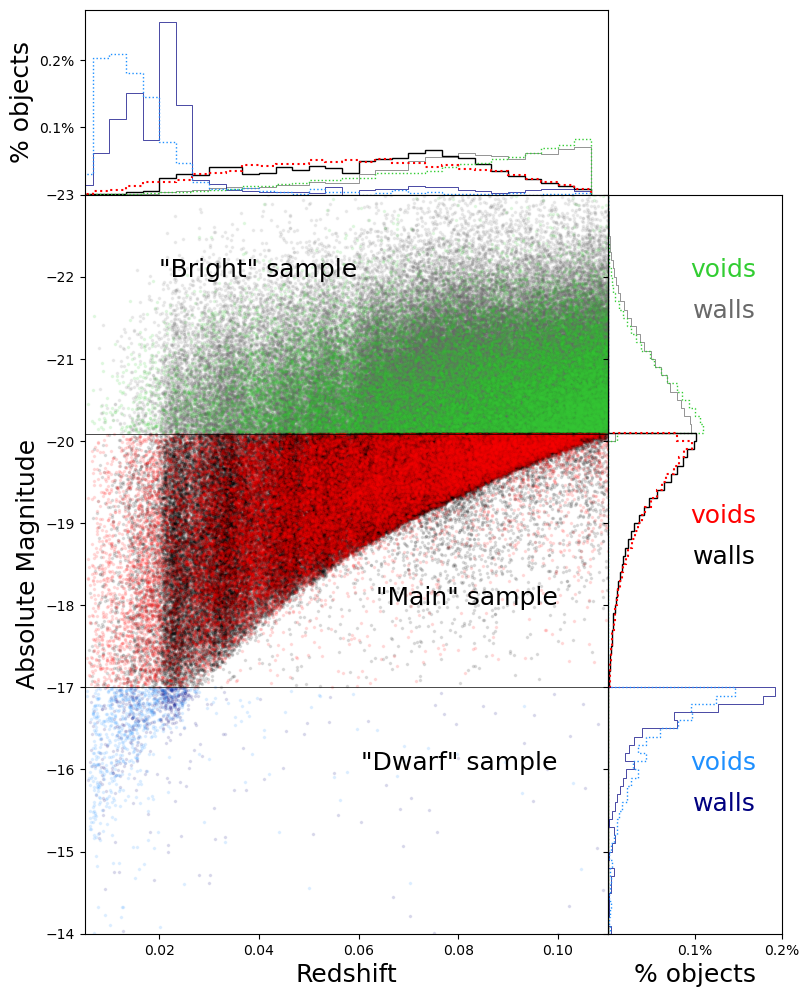

In [19]:
# plot M_r vs. z diagram!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (9, 12), 
                        gridspec_kw = {'height_ratios': [1, 4],
                                     'width_ratios': [3, 1]} )

size = 10.0
a = 0.1

z_bins = np.linspace(0, 0.11, num = 33, endpoint = False)
M_r_bins = np.linspace(-24, -10, num = 140, endpoint = False)

plt.subplots_adjust(wspace = 0, hspace = 0)

plt.gca().invert_yaxis()

axs[1, 0].scatter(walls_bright['Z'], 
                  walls_bright['rabsmag_NSA'], 
                  s = size, 
                  c = 'dimgrey',
                  marker = ".", 
                  label = 'bright walls',
                  alpha = a)

axs[1, 0].scatter(voids_bright['Z'], 
                  voids_bright['rabsmag_NSA'], 
                  s = size, 
                  c = 'limegreen',
                  marker = ".", 
                  label = 'bright voids',
                  alpha = a)


axs[1, 0].scatter(walls_main['Z'], 
                  walls_main['rabsmag_NSA'], 
                  s = size, 
                  c = 'black',
                  marker = ".", 
                  label = 'main walls',
                  alpha = a)

axs[1, 0].scatter(voids_main['Z'], 
                  voids_main['rabsmag_NSA'], 
                  s = size, 
                  c = 'red',
                  marker = ".", 
                  label = 'main voids',
                  alpha = a)


axs[1, 0].scatter(walls_dwarf['Z'], 
                  walls_dwarf['rabsmag_NSA'], 
                  s = size, 
                  c = 'navy',
                  marker = ".", 
                  label = 'dwarf walls',
                  alpha = a)

axs[1, 0].scatter(voids_dwarf['Z'], 
                  voids_dwarf['rabsmag_NSA'], 
                  s = size, 
                  c = 'dodgerblue',
                  marker = ".", 
                  label = 'dwarf voids',
                  alpha = a)

axs[1, 0].set_ylim([y_high - 4, y_low + 1])
axs[1, 0].set_xlim([0.005, x_high])

axs[1, 0].axhline(y = bright_line, color = 'black', linewidth = 0.5)
axs[1, 0].axhline(y = main_line, color = 'black', linewidth = 0.5)

# set the axes of the top left and bottom right subplots to be percentages
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

plt.rcParams.update({'font.size': 18})

# only label the outer axes of the grouped subplots
# for ax in axs.flat:
#     ax.label_outer()

    
# make a histogram in the top left subplot that corresponds
# manually increase the number of bins to more clearly see the distribution
axs[0, 0].hist(walls_bright['Z'], 
               color = "dimgray",
               histtype = "step",
               linewidth = 0.5,
               weights = np.ones_like(walls_bright['Z']) / len(walls_bright['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(walls_main['Z'], 
               color = "black",
               histtype = "step",
               linewidth = 1.0,
               weights = np.ones_like(walls_main['Z']) / len(walls_main['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(walls_dwarf['Z'], 
               color = "navy",
               histtype = "step",
               linewidth = 0.5,
               weights = np.ones_like(walls_dwarf['Z']) / len(walls_dwarf['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(voids_bright['Z'], 
               color = "limegreen",
               histtype = "step",
               linewidth = 1.0,
               linestyle = 'dotted',
               weights = np.ones_like(voids_bright['Z']) / len(voids_bright['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(voids_main['Z'], 
               color = "red",
               histtype = "step",
               linewidth = 1.5,
               linestyle = 'dotted',
               weights = np.ones_like(voids_main['Z']) / len(voids_main['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].hist(voids_dwarf['Z'], 
               color = "dodgerblue",
               histtype = "step",
               linewidth = 1.0,
               linestyle = 'dotted',
               weights = np.ones_like(voids_dwarf['Z']) / len(voids_dwarf['Z']),
#                alpha = a,
               bins = z_bins)

axs[0, 0].set_ylim([0.00001, 0.275])


axs[1, 1].hist(walls_bright['rabsmag_NSA'], 
               color = "dimgray", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 0.5,
#                label = 'bright walls',
               weights = np.ones_like(walls_bright['rabsmag_NSA']) / len(walls_bright['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].hist(voids_bright['rabsmag_NSA'], 
               color = "limegreen", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 1.0,
               linestyle = 'dotted',
#                label = 'bright voids',
               weights = np.ones_like(voids_bright['rabsmag_NSA']) / len(voids_bright['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].hist(walls_main['rabsmag_NSA'], 
               color = "black",
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 1.0,
#                label = 'main  walls',
               weights = np.ones_like(walls_main['rabsmag_NSA']) / len(walls_main['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].hist(voids_main['rabsmag_NSA'], 
               color = "red", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 1.5,
               linestyle = 'dotted',
#                label = 'main voids',
               weights = np.ones_like(voids_main['rabsmag_NSA']) / len(voids_main['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].hist(walls_dwarf['rabsmag_NSA'], 
               color = "navy", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 0.5,
#                label = 'dwarf walls',
               weights = np.ones_like(walls_dwarf['rabsmag_NSA']) / len(walls_dwarf['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

vd = axs[1, 1].hist(voids_dwarf['rabsmag_NSA'], 
               color = "dodgerblue", 
               orientation = 'horizontal',
               histtype = "step",
               linewidth = 1.0,
               linestyle = 'dotted',
#                label = 'dwarf voids',
               weights = np.ones_like(voids_dwarf['rabsmag_NSA']) / len(voids_dwarf['rabsmag_NSA']),
#                alpha = a,
               bins = M_r_bins)

axs[1, 1].set_xlim([0.0001, 0.200])

# Remove the unnecessary top right subplot
axs[0, 1].set_axis_off()

axs[1, 0].set_ylabel('Absolute Magnitude', fontsize = 18)
axs[1, 0].set_xlabel('Redshift', fontsize = 18.0)

axs[0, 0].set_ylabel('% objects', fontsize = 18)
axs[1, 1].set_xlabel('% objects', fontsize = 18)

# Add text labels
axs[1, 0].text(0.02, -22.0, '"Bright" sample', fontdict = None, size = 18, ha = 'left')
axs[1, 0].text(0.10, -18.0, '"Main" sample', fontdict = None, size = 18, ha = 'right')
axs[1, 0].text(0.10, -16.0, '"Dwarf" sample', fontdict = None, size = 18, ha = 'right')

axs[1, 1].text(0.17, -22.0, 'voids', fontdict = None, size = 18, c = 'limegreen', ha = 'right')
axs[1, 1].text(0.17, -21.5, 'walls', fontdict = None, size = 18, c = 'dimgray', ha = 'right')

axs[1, 1].text(0.17, -19.0, 'voids', fontdict = None, size = 18, c = 'red', ha = 'right')
axs[1, 1].text(0.17, -18.5, 'walls', fontdict = None, size = 18, c = 'black', ha = 'right')

axs[1, 1].text(0.17, -16.0, 'voids', fontdict = None, size = 18, c = 'dodgerblue', ha = 'right')
axs[1, 1].text(0.17, -15.5, 'walls', fontdict = None, size = 18, c = 'navy', ha = 'right')

fig.savefig('Figures/SVRSEF_rabsmag_vs_Z_' + 'new_' + timestamp() + '.png', dpi = 600)
plt.show()

In [16]:
# define value limits
y_low = -24.0
y_high = -10.0
x_low = 0.00
x_high = 0.11

In [17]:
total = len(voids_dwarf)
current = len(filter_new(voids_dwarf, x_low, x_high, y_low, y_high))
raised = len(filter_new(voids_dwarf, 0.01, x_high, y_low, y_high))
print(current)
print(raised)
print()
print(current/total)
print(raised/total)

718
547

0.9782016348773842
0.7452316076294278


In [18]:
total = len(walls_dwarf)
current = len(filter_new(walls_dwarf, x_low, x_high, y_low, y_high))
raised = len(filter_new(walls_dwarf, 0.01, x_high, y_low, y_high))
print(current)
print(raised)
print()
print(current/total)
print(raised/total)

540
497

0.9608540925266904
0.8843416370106761
